In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(palette='Set2')

In [5]:
#import dataset
df = pd.read_csv('churn.csv',index_col='RowNumber')

In [6]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#remove surname
df.drop(['Surname','CustomerId'],axis=1,inplace=True)

In [8]:
#gender count
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [9]:
#geography count
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
#check for null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


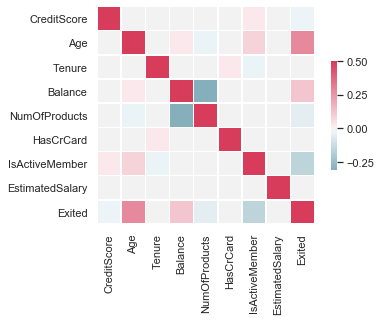

In [12]:
cmap = sns.diverging_palette(220, 5, as_cmap=True)
sns.heatmap(df.corr(),vmax=.5, center=0, cmap=cmap,square=True,linewidth=.5,cbar_kws={"shrink":.5})

In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
#total number of unique values in each column
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [15]:
df_cat = df[['Geography','Gender','Age','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']]

Graph for Geography: total = 3


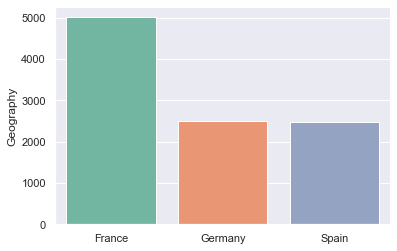

Graph for Gender: total = 2


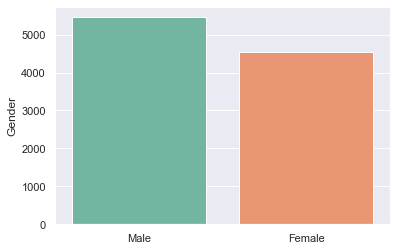

Graph for Age: total = 70


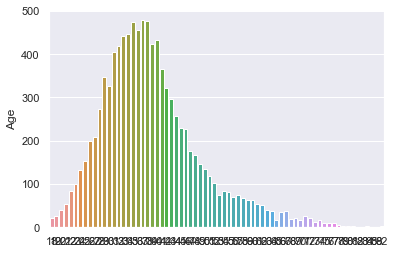

Graph for Tenure: total = 11


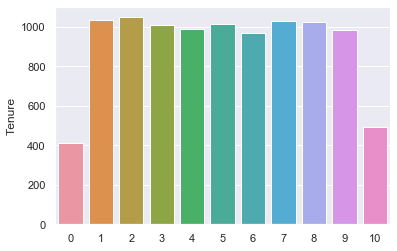

Graph for NumOfProducts: total = 4


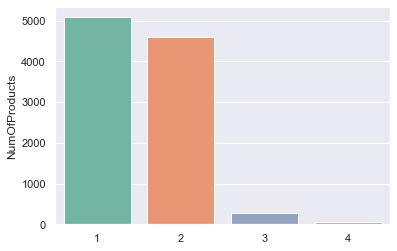

Graph for HasCrCard: total = 2


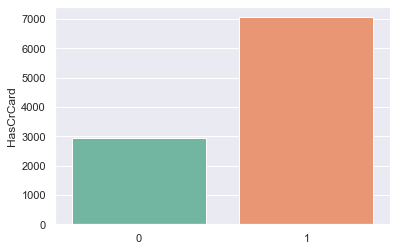

Graph for IsActiveMember: total = 2


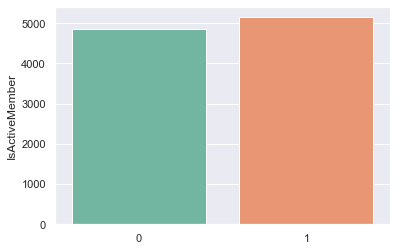

Graph for Exited: total = 2


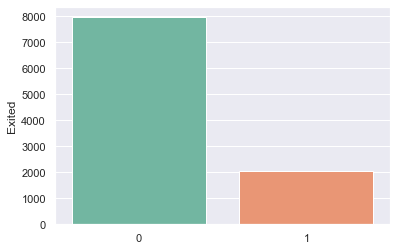

In [16]:
#get value counts of desired columns
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.show()

In [17]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

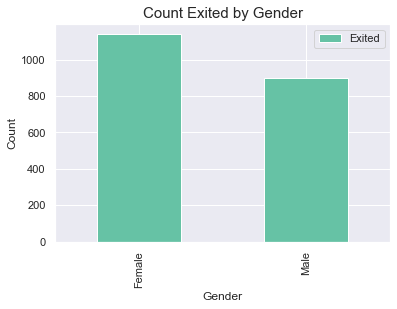

In [18]:
pd.pivot_table(df, index='Gender', values='Exited', aggfunc={'Exited':np.sum}).plot(kind='bar')
plt.title('Count Exited by Gender', fontsize=15)
plt.ylabel('Count')
plt.show()

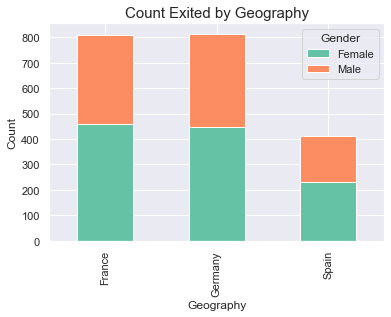

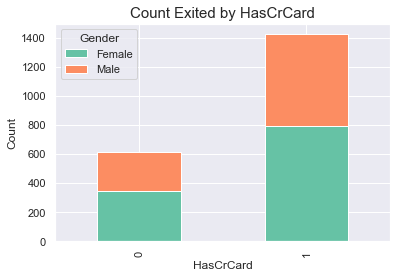

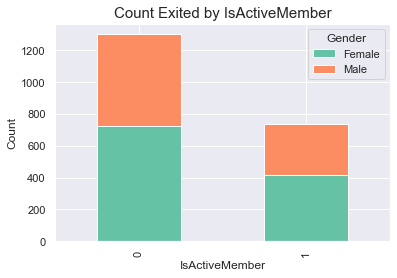

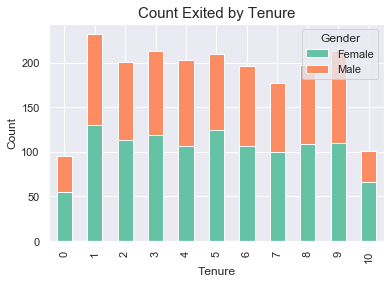

In [19]:
#total number of exits in different columns
piv_col = df[['Geography','HasCrCard','IsActiveMember','Tenure']]

for i in piv_col.columns:
    pd.pivot_table(df, index=i, columns='Gender',values='Exited', aggfunc={'Exited':np.sum}).plot(kind='bar',stacked=True)
    plt.title('Count Exited by %s' % (i), fontsize=15)
    plt.ylabel('Count')
    plt.show()

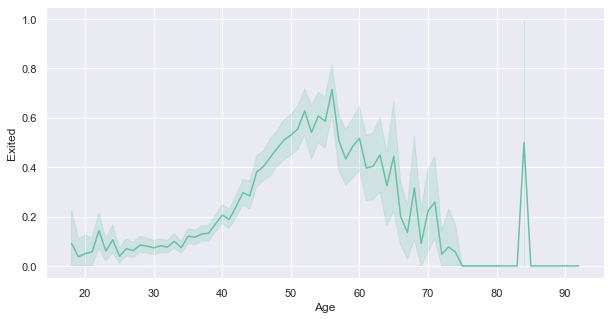

In [20]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Age',y='Exited',data=df)

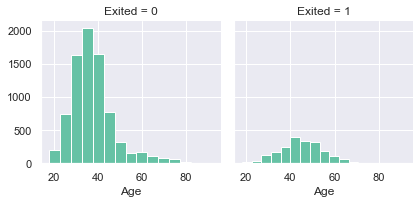

In [21]:
g = sns.FacetGrid(df, col='Exited')
g.map(plt.hist, 'Age', bins=15)

In [22]:
#check for non-numeric columns
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [23]:
#create dummy variables
df_dum=pd.get_dummies(df)

In [24]:
df_dum

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
RowNumber,,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
4,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9997,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9998,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0


In [25]:
#make sure all columns are numeric
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_France   10000 non-null  uint8  
 10  Geography_Germany  10000 non-null  uint8  
 11  Geography_Spain    10000 non-null  uint8  
 12  Gender_Female      10000 non-null  uint8  
 13  Gender_Male        10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 830.1 KB


In [27]:
#train test validation split
train, validate, test=np.split(df_dum, [int(.8 * len(df_dum)), int(.9 * len(df_dum))])

In [28]:
X_train = train.drop('Exited',axis=1)
y_train = train.Exited
X_val=validate.drop('Exited',axis=1)
y_val=validate.Exited

In [29]:
#cross validation
from sklearn.model_selection import cross_val_score

In [30]:
#CV logistic regression
from sklearn.linear_model import LogisticRegression
print("CV Logistic Regression")
print(np.mean(cross_val_score(LogisticRegression(tol=0.1),X_train,y_train,scoring='accuracy')))

CV Logistic Regression
0.788375


In [31]:
#CV random forest
from sklearn.ensemble import RandomForestClassifier
print("CV Random Forest")
print(np.mean(cross_val_score(RandomForestClassifier(),X_train,y_train,scoring='accuracy')))

CV Random Forest
0.8594999999999999


In [32]:
#CV SGD
from sklearn.linear_model import SGDClassifier
print("CV SGD")
print(np.mean(cross_val_score(SGDClassifier(),X_train,y_train,scoring='accuracy')))

CV SGD
0.76875


In [33]:
#CV decision tree
from sklearn.tree import DecisionTreeClassifier
print("CV Decision Tree")
print(np.mean(cross_val_score(DecisionTreeClassifier(),X_train,y_train,scoring='accuracy')))

CV Decision Tree
0.796


In [34]:
#build model - random forest
clf_1 = RandomForestClassifier().fit(X_train,y_train)
y_pred_1_train = clf_1.predict(X_train)
y_pred_1 = clf_1.predict(X_val)

from sklearn.metrics import precision_score, recall_score

#pevaluate predictions
print("Random Forest - Train")
print("Precision:", precision_score(y_train, y_pred_1_train) )
print("Recall:", recall_score(y_train, y_pred_1_train),'\n')
print("Random Forest - Test")
print("Precision:", precision_score(y_val, y_pred_1) )
print("Recall:", recall_score(y_val, y_pred_1) )

Random Forest - Train
Precision: 1.0
Recall: 1.0 

Random Forest - Test
Precision: 0.7583333333333333
Recall: 0.4312796208530806


In [36]:
#evaluate predictions on base model
print("Random Forest - Test")
pd.crosstab(y_train,pd.Series(y_pred_1),rownames=['ACTUAL'],colnames=['PRED'])

Random Forest - Test


PRED,0,1
ACTUAL,,
0,703,92
1,176,28


In [37]:
#target value counts
df_dum.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [38]:
# smote - unbalanced data
import imblearn
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X_train, y_train)

In [45]:
#fit model 
clf_2 = RandomForestClassifier().fit(X_sm,y_sm)

y_pred_2_train = clf_2.predict(X_sm)
y_pred_2 = clf_2.predict(X_val)

#evaluate predictions
print("Random Forest - SMOTE (val)")
print("Precision:", precision_score(y_val, y_pred_2) )
print("Recall:", recall_score(y_val, y_pred_2))

Random Forest - SMOTE (train)
Precision: 1.0
Recall: 1.0 

Random Forest - SMOTE (test)
Precision: 0.6568047337278107
Recall: 0.5260663507109005


In [50]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix - Test (Val): \n", confusion_matrix(y_val, y_pred_2))

Confusion Matrix: 
 [[731  58]
 [100 111]]


In [54]:
#predict class probabilities
y_prob_2 = clf_2.predict_proba(X_val)

#keep only the positive class
y_prob_2 = [p[1] for p in y_prob_2]

#compare true vs predicted and show probability prediction
compare=pd.DataFrame({"True":(y_val),"Prediction":(y_pred_2),"Churn Probability":(y_prob_2)})
print(compare.sample(20))

           True  Prediction  Churn Probability
RowNumber                                     
8003          0           0               0.08
8181          0           0               0.02
8897          0           0               0.03
8779          0           0               0.09
8085          0           0               0.08
8822          0           0               0.33
8020          0           0               0.25
8023          1           0               0.07
8522          0           0               0.06
8554          0           1               0.93
8247          0           0               0.01
8001          0           0               0.01
8190          0           0               0.00
8315          0           0               0.01
8394          1           1               0.81
8573          0           1               0.61
8740          0           0               0.07
8374          0           0               0.02
8680          1           0               0.15
8860         

### Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV

#tune n_estimators, max_features
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}
clf_gs = GridSearchCV(estimator=clf_2, param_grid=param_grid).fit(X_sm, y_sm)
print(clf_gs.best_params_)

{'max_features': 'sqrt', 'n_estimators': 700}


In [57]:
#tune n_estimators
param_grid = { 
    'n_estimators': [120,200,300],
}
clf_gs2 = GridSearchCV(estimator=clf_2, param_grid=param_grid).fit(X_sm, y_sm)
print(clf_gs2.best_params_)

{'n_estimators': 300}


In [58]:
#tune max_depth
param_grid = { 
    'max_depth': [5,8,15]
}
clf_gs3 = GridSearchCV(estimator=clf_2, param_grid=param_grid).fit(X_sm, y_sm)
print(clf_gs3.best_params_)

{'max_depth': 15}


In [59]:
#tune max_depth
param_grid = { 
    'max_depth': [15,25,30,None]
}
clf_gs4 = GridSearchCV(estimator=clf_2, param_grid=param_grid).fit(X_sm, y_sm)
print(clf_gs4.best_params_)

{'max_depth': 25}


In [60]:
#tune min_samples_leaft
param_grid = { 
    'min_samples_leaf': [1,2,5,10]
}
clf_gs5 = GridSearchCV(estimator=clf_2, param_grid=param_grid).fit(X_sm, y_sm)
print(clf_gs5.best_params_)

{'min_samples_leaf': 1}


In [64]:
#fit model 
clf_3 = RandomForestClassifier(max_features='sqrt',n_estimators=300,max_depth=25,min_samples_leaf=1).fit(X_sm,y_sm)

y_pred_3_train = clf_3.predict(X_sm)
y_pred_3 = clf_3.predict(X_val)

#evaluate predictions
print("Random Forest - optimized (val):")
print("Precision:", precision_score(y_val, y_pred_3) )
print("Recall:", recall_score(y_val, y_pred_3))

Random Forest - optimized (val)
Precision: 0.6342857142857142
Recall: 0.5260663507109005


In [65]:
print("Confusion Matrix - Val: \n", confusion_matrix(y_val, y_pred_3))

Confusion Matrix - Val: 
 [[725  64]
 [100 111]]


## Model Impact Business Value

In [26]:
#1 random sample treatment and control (50/50) split
#2 conversion rate in the control group (did order/total in the control)
#3 apply model to tx group and predict 
    #include true value (0 or 1)
#4 create decile column
#5 how many converted in each decile
    #count how many 1's there are for each decile divide by total
#6 lift over control= (tx conversion rate-control conversion rate)/control conversion rate
    #should get smaller down the list

In [66]:
#split dataset into treatment and control (50/50)
from sklearn.model_selection import train_test_split
control, treatment = train_test_split(test, test_size = 0.5, shuffle=True)

In [70]:
#total number of rows in test data
test.shape[0]

1000

In [68]:
#check control shape 
control.shape

(500, 14)

In [69]:
#check treatment shape
treatment.shape

(500, 14)

In [71]:
#value count or target in control group
control.Exited.value_counts()

0    410
1     90
Name: Exited, dtype: int64

In [72]:
#value count or target in treatment group
treatment.Exited.value_counts()

0    411
1     89
Name: Exited, dtype: int64

In [73]:
#conversion rate in the control group (ordered/total in the control)
control_churn_rate=control.Exited.value_counts()[1]/control.shape[0]
print("Control Churn Rate:",control_churn_rate)

Control Churn Rate: 0.18


In [74]:
#drop target column in treatment group
treatment_drop_Exited=treatment.drop('Exited',axis=1)

In [75]:
#apply trained model to tx group and predict probability
treatment_prob=clf_2.predict_proba(treatment_drop_Exited)
treatment_prob = [p[1] for p in treatment_prob]

In [76]:
#create new dataframe showing actual values (0 or 1) and treatment propensity probability
propensity=pd.DataFrame({"Actual":treatment.Exited, "Tx Churn Probability":treatment_prob}).sort_values(by="Tx Churn Probability",ascending=False)

In [77]:
propensity.head(10)

,Actual,Tx Churn Probability
RowNumber,,
9385,1,0.99
9402,1,0.99
9477,0,0.97
9636,1,0.93
9235,1,0.92
9467,1,0.92
9219,1,0.89
9881,0,0.88
9039,1,0.87


In [78]:
#create decile column
propensity['Decile'] = pd.qcut(propensity['Tx Churn Probability'].rank(method='first',ascending=False).values, 10).codes
propensity.sort_values(by="Tx Churn Probability", ascending=False)

,Actual,Tx Churn Probability,Decile
RowNumber,,,
9385,1,0.99,0
9402,1,0.99,0
9477,0,0.97,0
9636,1,0.93,0
9235,1,0.92,0
...,...,...,...
9106,0,0.00,9
9989,0,0.00,9
9454,0,0.00,9


In [79]:
#value counts of Exited in treatment group
treatment.Exited.value_counts()

0    411
1     89
Name: Exited, dtype: int64

In [80]:
#value counts of Exited in propensity data should match treatment group
propensity.Actual.value_counts()

0    411
1     89
Name: Actual, dtype: int64

In [81]:
#table showing Decile and True values
table=propensity.groupby(['Decile','Actual']).size().unstack()
table

Actual,0,1
Decile,,
0,20.0,30.0
1,34.0,16.0
2,38.0,12.0
3,42.0,8.0
4,38.0,12.0
5,43.0,7.0
6,50.0,NaN
7,49.0,1.0
8,49.0,1.0


In [82]:
#total count in each decile
propensity.Decile.value_counts()

9    50
8    50
7    50
6    50
5    50
4    50
3    50
2    50
1    50
0    50
Name: Decile, dtype: int64

In [83]:
#how many converted in each decile
total=propensity.Decile.value_counts()
tx_churn_rate=pd.DataFrame({"Actual":table[1],"Total":total,"Tx Churn Rate":table[1]/total})
tx_churn_rate

,Actual,Total,Tx Churn Rate
0,30.0,50,0.60
1,16.0,50,0.32
2,12.0,50,0.24
3,8.0,50,0.16
4,12.0,50,0.24
5,7.0,50,0.14
6,NaN,50,NaN
7,1.0,50,0.02
8,1.0,50,0.02
9,2.0,50,0.04


In [84]:
#name index as Decile
tx_churn_rate.index.name = 'Decile'
tx_churn_rate

,Actual,Total,Tx Churn Rate
Decile,,,
0,30.0,50,0.60
1,16.0,50,0.32
2,12.0,50,0.24
3,8.0,50,0.16
4,12.0,50,0.24
5,7.0,50,0.14
6,NaN,50,NaN
7,1.0,50,0.02
8,1.0,50,0.02


In [85]:
#confirm conversion for first decile group is correct
tx_churn_rate.Actual[0]/tx_churn_rate.Total[0]

0.6

In [86]:
#lift over control= (treatment conversion rate - control conversion rate)/control conversion rate
lift=(tx_churn_rate['Tx Churn Rate']-control_churn_rate)/control_churn_rate
lift

Decile
0    2.333333
1    0.777778
2    0.333333
3   -0.111111
4    0.333333
5   -0.222222
6         NaN
7   -0.888889
8   -0.888889
9   -0.777778
Name: Tx Churn Rate, dtype: float64

In [87]:
#add lift column
tx_churn_rate['Lift'] = lift
tx_churn_rate

,Actual,Total,Tx Churn Rate,Lift
Decile,,,,
0,30.0,50,0.60,2.333333
1,16.0,50,0.32,0.777778
2,12.0,50,0.24,0.333333
3,8.0,50,0.16,-0.111111
4,12.0,50,0.24,0.333333
5,7.0,50,0.14,-0.222222
6,NaN,50,NaN,NaN
7,1.0,50,0.02,-0.888889
8,1.0,50,0.02,-0.888889


In [90]:
#apply control conversion rate to people in deciles with higher conversion rate than baseline
tx_churn_rate.loc[tx_churn_rate['Lift'] >= control_churn_rate, 'Control Churn Rate'] = control_churn_rate 
tx_churn_rate.loc[tx_churn_rate['Lift'] < control_churn_rate, 'Control Churn Rate'] = "-" 
tx_churn_rate

,Actual,Total,Tx Churn Rate,Lift,Control Churn Rate
Decile,,,,,
0,30.0,50,0.60,2.333333,0.18
1,16.0,50,0.32,0.777778,0.18
2,12.0,50,0.24,0.333333,0.18
3,8.0,50,0.16,-0.111111,-
4,12.0,50,0.24,0.333333,0.18
5,7.0,50,0.14,-0.222222,-
6,NaN,50,NaN,NaN,NaN
7,1.0,50,0.02,-0.888889,-
8,1.0,50,0.02,-0.888889,-
